## Initial EDA

load in the data and first look at our target variable


In [3]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [13]:
#df = pd.read_excel('Full_Datav5.xlsx', header=0)
#df = pd.read_csv('Full_Datav5.csv', header=0)



#y = df['Y']
#y = df.Y

#df.head()

#df = pd.read_excel('Full_Datav4.xls', header=0)
df = pd.read_excel('Full_Datav4.xls')
#df = pd.read_excel('../default_of_credit_card_clients.xls', header=0)

df.columns = df.iloc[0,:]

df.rename(index=str, columns={"SNAP Per Capita Benefit or TAM": "Y"}, inplace=True)

#df.drop('ID', inplace=True, axis=0)

#y = df["Y"]
#y = df.Y

df.head()

,United States,15811787,40794410.46,0.13212955472736257,61313998921.380005,216271644,27437114,59093612,62853315,41377068,...,258267944,37.2,35.8,38.5,116716292,2.58,74181467,nan,nan,nan
0,United States,15811787,40794410.46,0.132130,6.131400e+10,216271644,27437114,59093612,62853315,41377068,...,258267944,37.2,35.8,38.5,116716292,2.58,74181467,NaN,NaN,NaN
1,Alabama,285458,707935.84,0.148112,1.064028e+09,3276637,481059,1012551,979449,503930,...,4594134,37.9,36.4,39.1,1883791,2.48,1132459,1.0,NaN,NaN
2,Alaska,32796,86909.40,0.122368,1.306248e+08,475442,36177,131293,170151,88308,...,670982,33.8,33.6,34.1,258058,2.65,187378,2.0,NaN,NaN
3,Arizona,324442,853282.46,0.133492,1.282484e+09,4516175,609649,1091339,1530530,802435,...,4496868,35.9,34.8,37.2,2380990,2.63,1629014,4.0,NaN,NaN
4,Arkansas,160968,397590.96,0.136352,5.975792e+08,1985770,286117,681486,580739,280677,...,2729868,37.4,36.1,38.7,1147084,2.47,711475,5.0,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36127 entries, 0 to 36126
Data columns (total 39 columns):
United States          36127 non-null object
15811787               36127 non-null int64
40794410.46            36127 non-null float64
0.13212955472736257    36005 non-null float64
61313998921.380005     36127 non-null float64
216271644              36127 non-null int64
27437114               36127 non-null int64
59093612               36127 non-null int64
62853315               36127 non-null int64
41377068               36127 non-null int64
25510535               36127 non-null int64
259992659              36127 non-null int64
35556133               36127 non-null int64
41824672               36127 non-null int64
22623950               36127 non-null int64
36003301               36127 non-null int64
28542281               36127 non-null int64
30968277               36127 non-null int64
21795300               36127 non-null int64
9190131                36127 non-null int64
33488614 

All of these columns should be columns should be numeric, so let's convert it all to numeric

In [15]:
df = df.astype('float32')

ValueError: could not convert string to float: 'United States'

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36127 entries, 0 to 36126
Data columns (total 39 columns):
United States          36127 non-null object
15811787               36127 non-null int64
40794410.46            36127 non-null float64
0.13212955472736257    36005 non-null float64
61313998921.380005     36127 non-null float64
216271644              36127 non-null int64
27437114               36127 non-null int64
59093612               36127 non-null int64
62853315               36127 non-null int64
41377068               36127 non-null int64
25510535               36127 non-null int64
259992659              36127 non-null int64
35556133               36127 non-null int64
41824672               36127 non-null int64
22623950               36127 non-null int64
36003301               36127 non-null int64
28542281               36127 non-null int64
30968277               36127 non-null int64
21795300               36127 non-null int64
9190131                36127 non-null int64
33488614 

## Let's look at the target variable.

In [17]:
df.Y.value_counts().plot(kind='bar')

AttributeError: 'DataFrame' object has no attribute 'Y'

There is some inbalance here, so we need to note to do some sort of imbalance handling later in the pipeline.

Now let's look at some univariate plots to get a sense of what our features look like.

In [18]:
df.columns

Index([    'United States',            15811787,         40794410.46,
       0.13212955472736257,  61313998921.380005,           216271644,
                  27437114,            59093612,            62853315,
                  41377068,            25510535,           259992659,
                  35556133,            41824672,            22623950,
                  36003301,            28542281,            30968277,
                  21795300,             9190131,            33488614,
                 308745538,           223553265,            38929319,
                   2932248,            14674252,              540013,
                  19107368,             9009073,           258267944,
                      37.2,                35.8,                38.5,
                 116716292,                2.58,            74181467,
                       nan,                 nan,                 nan],
      dtype='object', name=0)

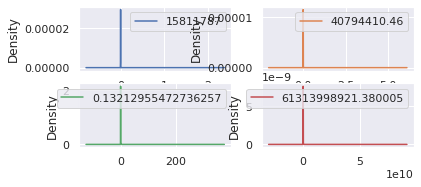

In [19]:
#create histograms for each variable
#we'll group some of the columns together to make plotting easier

df_group1 = df.iloc[:, 0:5]
df_group1.plot(kind='density', subplots=True, layout=(3,2), sharex=False)
plt.show()


#df.hist()
#plt.show()

Some notes: LIMIT_BAL and AGE are approaching a gaussian shape, but both are somewhat rightly skewed. Both sex and Marriage are bimodal (obviously), and Education is trimodal, with the three most common values of 1, 2, 3, and a tiny amount of 4, and 5. Besides LIMIT_BAL, nothing particular about these features. 

Next, we'll look at the Payment history. Since the values in these features are categorical in nature, we'll use bar plots.


KeyError: 'PAY_0'

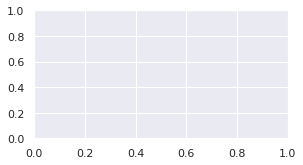

In [20]:
#create group
df_pay_hist = df.iloc[:,5:11]

fig, ax = plt.subplots(figsize = (10,8), sharex=True)


plt.subplot(3,2,1)
df['PAY_0'].value_counts().plot(kind='bar')

plt.subplot(3,2,2)
df['PAY_2'].value_counts().plot(kind='bar')

plt.subplot(3,2,3)
df['PAY_3'].value_counts().plot(kind='bar')

plt.subplot(3,2,4)
df['PAY_4'].value_counts().plot(kind='bar')

plt.subplot(3,2,5)
df['PAY_5'].value_counts().plot(kind='bar')

plt.subplot(3,2,6)
df['PAY_6'].value_counts().plot(kind='bar')





Some notes: all the plots are pretty much the same. Values of 0 are the most common by a large amount, i.e. another instance of some class inbalance. Will have to handle as well. 

Next, look at the Bill amounts.

In [ ]:
df['BILL_AMT1'].plot(kind='hist', )

In [ ]:
#create group
ax, fig = plt.subplots(figsize = (10,8))
bill_amts = df.iloc[:, 11:17]

plt.subplot(3,2,1)
bill_amts['BILL_AMT1'].hist(bins=25)

plt.subplot(3,2,2)
bill_amts['BILL_AMT2'].hist(bins=25)

plt.subplot(3,2,3)
bill_amts['BILL_AMT3'].hist(bins=25)

plt.subplot(3,2,4)
bill_amts['BILL_AMT4'].hist(bins=25)

plt.subplot(3,2,5)
bill_amts['BILL_AMT5'].hist(bins=25)

plt.subplot(3,2,6)
bill_amts['BILL_AMT6'].hist(bins=25)




In [ ]:
# ds1 = pd.Series([PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6])
# ds2 = pd.Series([BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6])
# Outstanding_Bal = ds2 - ds1

# print(Outstanding_Bal)

In [ ]:
# Load libraries

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
# divided columns into two types of variables - target variable (y) and feature variables (X).
X = df.drop(columns="Y")
y = df.Y

In [ ]:
X

In [ ]:
# Split dataset into training set and test set
# 70% training and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019) 


### Building Decision Tree Model
Let's create a Decision Tree Model using `DecisionTreeClassifier` provided in `Scikit-learn`.

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluating Model
Estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values (y_test) and predicted values (y_pred).

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
# created new column OUTSTANDING_BAL for each month

df["OUTSTANDING_BAL1"] = (df.BILL_AMT1 - df.PAY_AMT1)
df["OUTSTANDING_BAL2"] = (df.BILL_AMT2 - df.PAY_AMT2)
df["OUTSTANDING_BAL3"] = (df.BILL_AMT3 - df.PAY_AMT3)
df["OUTSTANDING_BAL4"] = (df.BILL_AMT4 - df.PAY_AMT4)
df["OUTSTANDING_BAL5"] = (df.BILL_AMT5 - df.PAY_AMT5)
df["OUTSTANDING_BAL6"] = (df.BILL_AMT6 - df.PAY_AMT6)

df.head(5)

In [ ]:
# created new column %_LIMIT_BAL for each month

df["%_LIMIT_BAL1"] = (df.OUTSTANDING_BAL1 / df.LIMIT_BAL)
df["%_LIMIT_BAL2"] = (df.OUTSTANDING_BAL2 / df.LIMIT_BAL)
df["%_LIMIT_BAL3"] = (df.OUTSTANDING_BAL3 / df.LIMIT_BAL)
df["%_LIMIT_BAL4"] = (df.OUTSTANDING_BAL4 / df.LIMIT_BAL)
df["%_LIMIT_BAL5"] = (df.OUTSTANDING_BAL5 / df.LIMIT_BAL)
df["%_LIMIT_BAL6"] = (df.OUTSTANDING_BAL6 / df.LIMIT_BAL)


df.head(5)

In [ ]:
df.info()

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns, class_names=['0','1']) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('credit_card.png')
Image(graph.create_png())

In [ ]:
# divided columns into two types of variables - target variable (y) and feature variables (X).
X = df.drop(columns=["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6", "Y"])
y = df.Y

In [ ]:
X.columns

In [ ]:
# Split dataset into training set and test set
# 70% training and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019) 


### Building Decision Tree Model
Let's create a Decision Tree Model using `DecisionTreeClassifier` provided in `Scikit-learn`.

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluating Model
Estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values (y_test) and predicted values (y_pred).

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
# divided columns into two types of variables - target variable (y) and feature variables (X).
X = df.drop(columns=['PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'OUTSTANDING_BAL1',
       'OUTSTANDING_BAL2', 'OUTSTANDING_BAL3', 'OUTSTANDING_BAL4',
       'OUTSTANDING_BAL5', 'OUTSTANDING_BAL6', "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6", "Y"])
y = df.Y

In [ ]:
X.columns

In [ ]:
# Split dataset into training set and test set
# 70% training and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019) 


### Building Decision Tree Model
Let's create a Decision Tree Model using `DecisionTreeClassifier` provided in `Scikit-learn`.

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluating Model
Estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values (y_test) and predicted values (y_pred).

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

## Results
Creating calculated columns for Increasing outstanding balance per month column and Outstanding Bal had no meaningful effect and removing the repayment status, outstanding balance, bill amount lowered the accuracy by about a half percent
